In [35]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import sys
sys.path.append('../code_clean_data')



In [36]:
f = "../processed_data/analysis_data/combined_new.csv"
df = pd.read_csv(f)

In [38]:
df.head(2)

,date_minsk,district_name,district_labels,num_msgs,region_name,small_protest_1,large_protest_1,small_protest_2,large_protest_2,small_protest_3,...,log_num_msg_MA3,log_num_msg_MA5,log_num_msg_MA7,lag_repression_binary,lag_district_total_protest_rollSum5,lag_log_num_msgs,lag_log_repression_count,lag_log_num_msg_MA3,lag_log_num_msg_MA5,lag_log_num_msg_MA7
0,2020-08-09,Ashmyany,"Grodno, Ashmyany",2.0,Grodno,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-10,Ashmyany,"Grodno, Ashmyany",150.0,Grodno,1,0,1,0,1,...,NaN,NaN,NaN,0.0,NaN,1.098612,0.0,NaN,NaN,NaN


In [30]:
df_heat = df.loc[:,["date_minsk", "district_name", "repression_count"]]
df_heat.head()

,date_minsk,district_name,repression_count
0,2020-08-09,Ashmyany,0
1,2020-08-10,Ashmyany,0
2,2020-08-11,Ashmyany,0
3,2020-08-12,Ashmyany,0
4,2020-08-13,Ashmyany,0


In [31]:
df_heat[df_heat.duplicated()]

,date_minsk,district_name,repression_count


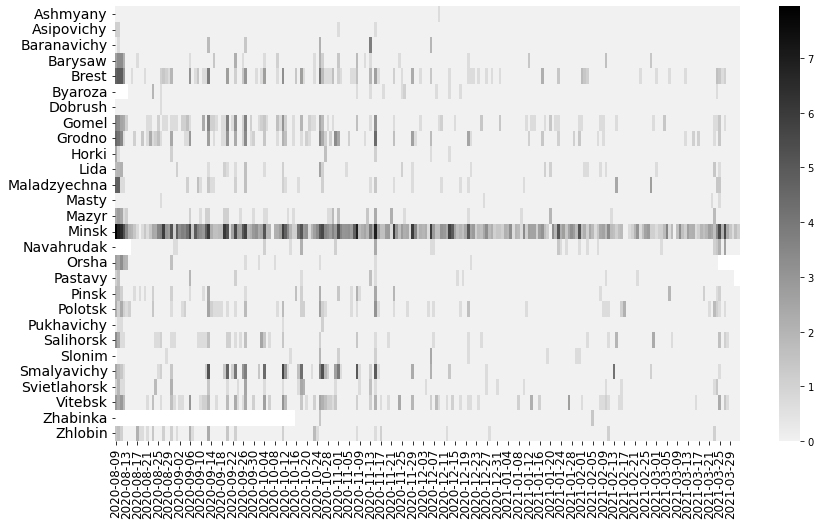

In [32]:
import seaborn as sns

df_heat = df.loc[:,["date_minsk", "district_name", "repression_count"]]
df_heat.repression_count = np.log(df_heat.repression_count+1)

# Pivot the dataframe to create a heatmap
heatmap_data = df_heat.pivot(index='district_name', columns='date_minsk', values='repression_count')

# Create the heatmap using seaborn
fig, ax = plt.subplots(figsize=(14, 8))  # set the figure size
cmap = sns.light_palette("black", as_cmap=True)
sns.heatmap(heatmap_data, cmap=cmap, ax=ax)

# Set the font size of x and y labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')

# Set the font size of the title
#plt.title("Heatmap of Log(Repression Count) by Date and District", fontsize=20)


# Display the heatmap
plt.show()
fig.savefig('../plots/daily_repression.pdf', dpi=300, bbox_inches='tight')



In [33]:
np.log(np.log(df.repression_count+1).max())

2.0721659899851788

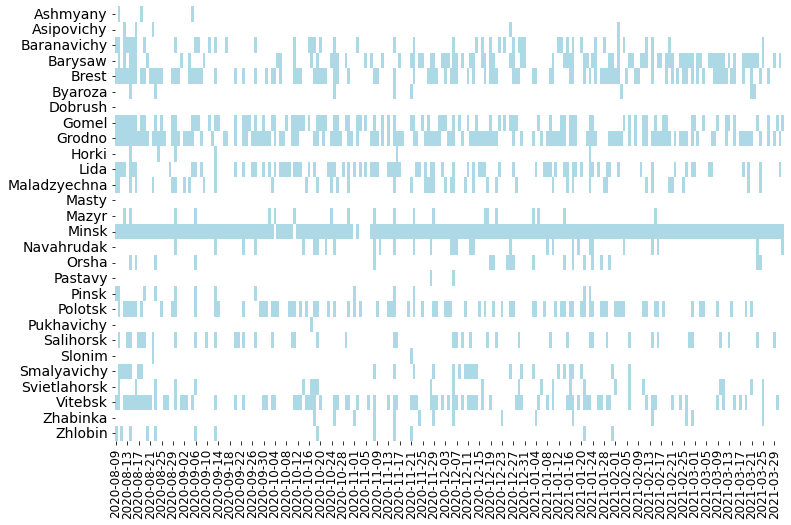

In [43]:

df_heat2 = df[["date_minsk", "district_name", "district_total_protest"]]

# create a contingency table
ct = pd.crosstab(df_heat2['district_name'], df_heat2['date_minsk'], values=df_heat2['district_total_protest'], aggfunc='sum')

# Create the heatmap using seaborn
fig, ax = plt.subplots(figsize=(12, 8))  # set the figure size
# define the custom colormap
colors = ['white', '#ADD8E6']
cmap = mcolors.LinearSegmentedColormap.from_list('Custom', colors, len(colors))

sns.heatmap(ct, cmap=cmap, ax=ax, cbar=False)

# Set the font size of x and y labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')

# Set the font size of the title
#plt.title("Heatmap showing if there is a protest (small or large) by Date and District", fontsize=20)


# show the plot
plt.show()

#fig.savefig('../plots/daily_protests.pdf', dpi=300, bbox_inches='tight')



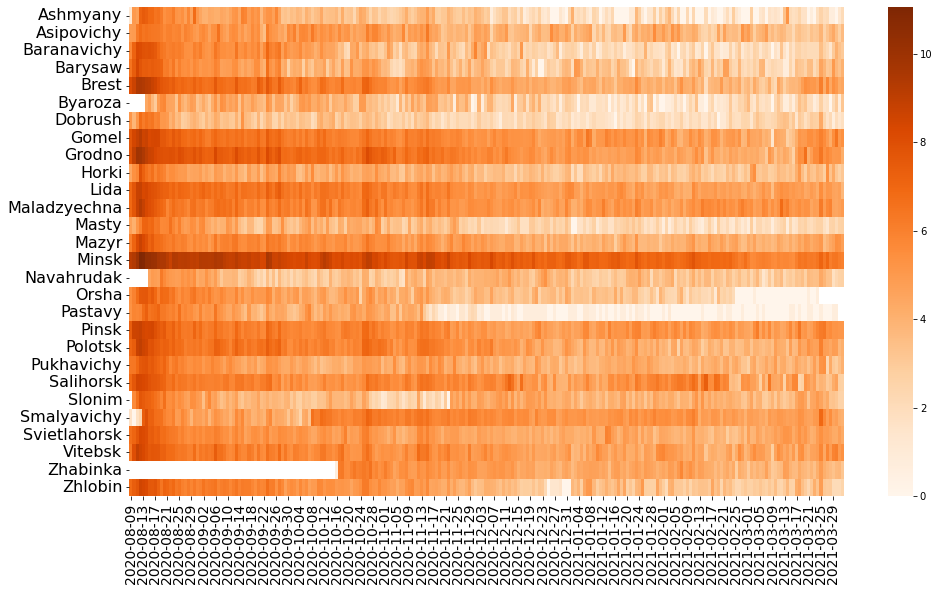

In [44]:
df_heat3 = df.loc[:, ["date_minsk", "district_name", "num_msgs"]]
df_heat3.num_msgs = np.log(df_heat3.num_msgs+1)

# create a contingency table
heatmap_data = df_heat3.pivot(index='district_name', columns='date_minsk', values='num_msgs')

# create a heatmap
# Create the heatmap using seaborn
fig, ax = plt.subplots(figsize=(16, 9))  # set the figure size
# define the custom colormap
cmap = sns.light_palette("orange", as_cmap=True)
sns.heatmap(heatmap_data, cmap="Oranges", ax=ax, cbar=True)

# Set the font size of x and y labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('')

# Set the font size of the title
#plt.title("Heatmap showing Log(Number of Messages) by Date and District", fontsize=20)


# show the plot
plt.show()

fig.savefig('../plots/daily_log_msgs.pdf', dpi=300, bbox_inches='tight')

